# Proyecto Data Science I – Entrega 1

### Dataset: Adult Income (Census Income)

**Resumen**
El conjunto de datos “Adult Income” tiene 48.842 registros y 15 atributos socioeconómicos y demográficos, además de una variable objetivo que indica si los ingresos anuales de una persona superan o no los 50.000 USD. Entre las variables se incluyen la edad, la clase de trabajo (sector privado, gobierno local, estatal, sin sueldo, etc.),  el nivel educativo y número de años de educación, el estado civil, la ocupación, la relación familiar, la raza, el sexo, las ganancias y pérdidas de capital, las horas trabajadas por semana y el país de origen.

Algunos atributos son continuos y otros categóricos, y existen valores faltantes codificados con el símbolo “?”.

El objetivo de esta entrega es realizar un análisis exploratorio que permita entender cómo estas variables se relacionan con la capacidad de una persona para superar el umbral de ingresos, formulando preguntas e hipótesis de interés y generando visualizaciones e interpretaciones.

**Preguntas de interes e hipotesis**

1. **¿El nivel educativo influye en los ingresos?** Hipotesis: Las personas con niveles educativos mas altos (licenciatura o superior) tienen mayor probabilidad de ganar mas de 50 K al año.
2. **¿Existe relacion entre las horas trabajadas por semana y la categoria de ingresos?** Hipotesis: Trabajar mas horas se asocia con mayores ingresos.


In [ ]:
# Importar librerias y cargar el conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

column_names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Cargar el dataset desde el enlace UCI
data = pd.read_csv(url, names=column_names, na_values='?', skipinitialspace=True)

# Mostrar las primeras filas
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Dimensión del dataset y tipos de datos
print('Dimensión del dataset:', data.shape)
print('\nTipos de datos:')
print(data.dtypes)

# Conteo de valores faltantes
print('\nValores faltantes por columna:')
print(data.isnull().sum())

# Estadísticas descriptivas de variables numéricas
print('\nEstadísticas descriptivas:')
print(data[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].describe())

Dimensión del dataset: (32561, 15)

Tipos de datos:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Valores faltantes por columna:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Estadísticas descriptivas:
                age  education_num  capital_gain  capital_loss  hours_per_week
count  32561.000000   32561.000000  32561.000000  32561.000000

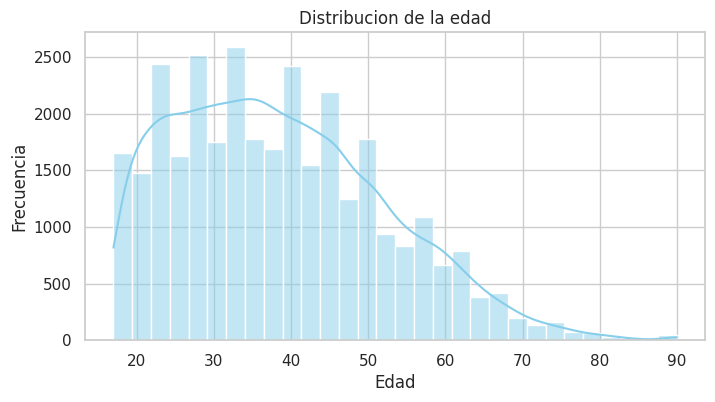

In [6]:
# Histograma de la edad
plt.figure(figsize=(8,4))
sns.histplot(data['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribucion de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

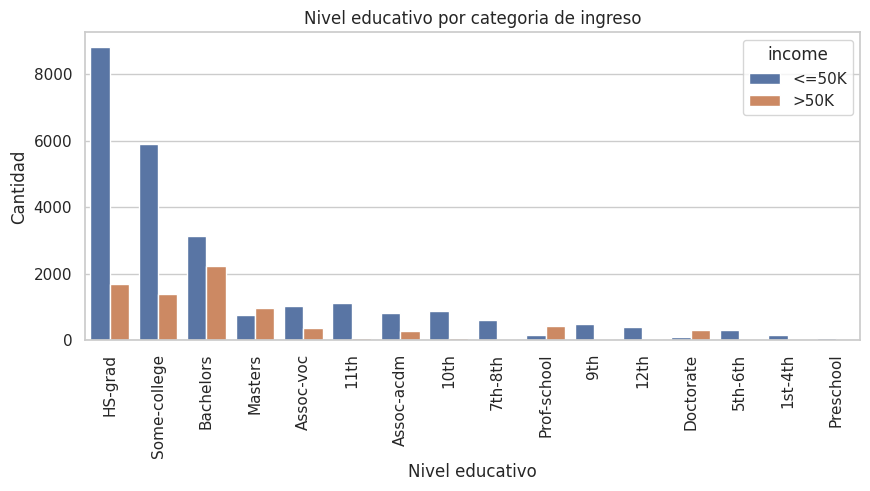

In [7]:
# Grafico de barras: nivel educativo vs ingreso
plt.figure(figsize=(10,4))
order = data['education'].value_counts().index
sns.countplot(x='education', hue='income', data=data, order=order)
plt.xticks(rotation=90)
plt.title('Nivel educativo por categoria de ingreso')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.show()

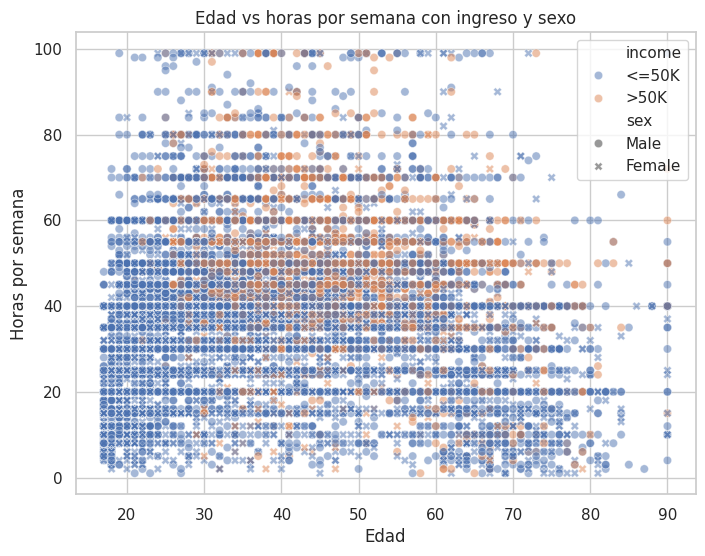

In [8]:
# Diagrama de dispersion: edad vs horas por semana
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='hours_per_week', hue='income', style='sex', data=data, alpha=0.5)
plt.title('Edad vs horas por semana con ingreso y sexo')
plt.xlabel('Edad')
plt.ylabel('Horas por semana')
plt.show()

**Interpretacion de las visualizaciones**

Al observar el histograma de edades, queda claro que la mayoría de las personas de la muestra se concentra en torno a los 38 años, aunque hay casos que van desde los 17 hasta casi los 90. La distribución no es uniforme: se acumula especialmente entre los 28 y 48 años, lo que indica que la fuerza laboral representada aquí está compuesta sobre todo por adultos en plena edad productiva.

Si miramos la distribución de las horas trabajadas por semana, la cifra que se repite con mayor frecuencia es 40 horas. Tanto quienes ganan más como quienes ganan menos de 50 000 USD al año presentan esa misma mediana. Esto sugiere que trabajar más horas no garantiza por sí solo un salario mayor, aunque entre quienes obtienen ingresos altos hay algunos casos que superan ampliamente las 60 horas semanales.

El gráfico de barras que cruza nivel educativo e ingresos revela un patrón interesante: los grupos con estudios universitarios o posgrado tienen mayor probabilidad de situarse en la categoría de ingresos altos. En cambio, entre quienes solo cuentan con educación secundaria o parte de ella, la proporción de sueldos superiores a 50 000 USD es menor. Este hallazgo respalda la hipótesis de que la formación académica influye significativamente en el nivel de ingresos.

El boxplot de horas semanales refuerza esta idea de dispersión: aunque la mediana se mantiene en torno a las 40 horas para todos, la variabilidad es mayor entre los que superan el umbral salarial, con presencia de valores extremos.

En el diagrama de dispersión de edad frente a horas trabajadas, coloreado por categoría de ingreso y diferenciando por sexo, se aprecia que la mayoría de las personas con ingresos altos tiene más de 30 años y muestra un abanico más amplio de horas trabajadas. Además, la proporción de hombres que superan los 50 000 USD es bastante mayor que la de mujeres, lo que apunta a una posible brecha de género en la muestra.

Por último, aunque se detectan valores faltantes en algunas columnas como workclass, occupation y native_country, su volumen es relativamente pequeño y podrá manejarse en etapas posteriores del análisis sin alterar significativamente las conclusiones.


